<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_9_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

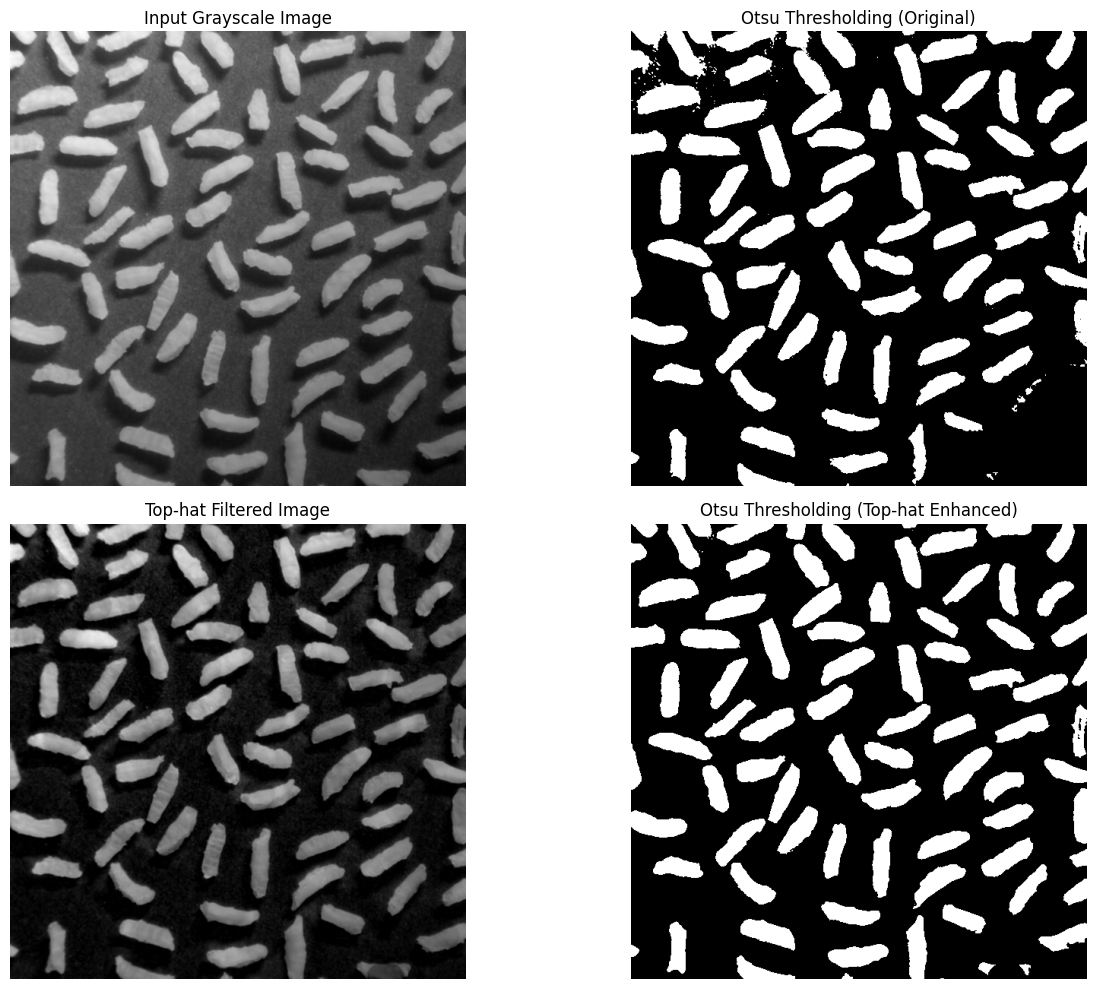

In [ ]:
import cv2  # 영상 처리에 사용되는 OpenCV 라이브러리
import numpy as np  # 수치 연산과 배열 조작을 위한 NumPy
import matplotlib.pyplot as plt  # 이미지 시각화를 위한 Matplotlib
import urllib.request  # 웹에서 이미지 데이터를 불러오기 위한 모듈

# 웹 이미지 주소 지정
source_link = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif'

# URL로부터 이미지 데이터를 받아오는 함수
def get_gray_image_from_url(image_url):
    stream = urllib.request.urlopen(image_url)
    byte_stream = bytearray(stream.read())
    np_data = np.asarray(byte_stream, dtype=np.uint8)
    return cv2.imdecode(np_data, cv2.IMREAD_GRAYSCALE)

# 입력 이미지 불러오기
gray_rice = get_gray_image_from_url(source_link)

# (1) 전처리된 이미지를 기반으로 자동 임계값(Otsu)을 적용해 객체를 분리
_, binary_otsu = cv2.threshold(gray_rice, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# (2) 밝기 보정을 위해 타원형 커널로 Top-hat 연산을 수행
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))

# Top-hat 변환 실행 (입력 이미지에서 열림 연산 결과를 뺌)
tophat_output = cv2.morphologyEx(gray_rice, cv2.MORPH_TOPHAT, ellipse_kernel)

# (3) Top-hat 처리 이미지에 대해 Otsu 이진화 다시 적용
_, binary_after_tophat = cv2.threshold(tophat_output, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 결과 시각화
plt.figure(figsize=(14, 10))

# 원본 이미지 출력
plt.subplot(2, 2, 1)
plt.imshow(gray_rice, cmap='gray')
plt.title("Input Grayscale Image")
plt.axis('off')

# 원본 이미지에 대한 Otsu 결과 출력
plt.subplot(2, 2, 2)
plt.imshow(binary_otsu, cmap='gray')
plt.title("Otsu Thresholding (Original)")
plt.axis('off')

# Top-hat 변환 결과 출력
plt.subplot(2, 2, 3)
plt.imshow(tophat_output, cmap='gray')
plt.title("Top-hat Filtered Image")
plt.axis('off')

# Top-hat 후 Otsu 결과 출력
plt.subplot(2, 2, 4)
plt.imshow(binary_after_tophat, cmap='gray')
plt.title("Otsu Thresholding (Top-hat Enhanced)")
plt.axis('off')

plt.tight_layout()
plt.show()


# ### 결과 분석 ###
#
# 원본 영상에 Otsu 이진화를 바로 적용한 경우:
#    - 이미지 전체 밝기가 고르지 않아 Otsu 알고리즘이 전체 밝기 분포만을 기준으로 임계값을 결정하면서 배경과 객체(쌀알)를 제대로 구분하지 못하는 경우가 발생함.
#    - 그 결과 이미지의 우하단에 위치한 어두운 일부 쌀알이 누락되거나 배경의 일부가 객체처럼 잘못 이진화되는 현상이 관찰됨.
#
# Top-hat 연산 후 Otsu 이진화를 적용한 경우:
#    - Top-hat 변환은 밝은 객체와 배경 사이의 빛 차이를 강조하는 효과가 있음.
#    - 이미지의 배경 조도는 제거되고 객체만 상대적으로 밝아지므로 Otsu 이진화가 더 효과적으로 적용됨.
#    - 결과적으로 쌀알이 또렷하게 추출되고 배경 노이즈는 훨씬 줄어들어 원본 영상에 Otsu 이진화를 바로 적용한 경우보다 전처리 품질이 크게 향상됨.
#
#
#    - 처음에 Otsu 알고리즘을 바로 적용했을 땐 이미지 밝기 차이 때문에 일부 쌀알이 배경으로 처리되거나 흐릿하게 나타남.
#    - 반면 Top-hat 처리를 하고 나서 Otsu 이진화를 적용하니 전체적으로 쌀알이 더 선명하게 추출됨.
#    - Top-hat 연산은 밝은 물체와 배경의 밝기 차이를 부각시켜주기 때문에 임계값을 결정하는 데 더 유리한 조건을 만들어줌.
#    - 이런 방식은 특히 조명이 일정하지 않은 환경에서 유용하게 쓸 수 있음.